In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
!ls

5c9fa979-5a84-45d6-93b9-543d1a0efc41.csv
9db113a1-cdbe-4b1c-98c2-11590f124dd8.csv
BloodDonationSubmissionFormat.csv
bd1.ipynb
bd2_best_sol.ipynb
bd3.ipynb
bd4.ipynb
bd5.ipynb
subm1.csv
subm2.csv
subm3.csv
subm4.csv
subm5.csv
subm6.csv
subm7.csv
subm8.csv


In [3]:
train = pd.read_csv('9db113a1-cdbe-4b1c-98c2-11590f124dd8.csv')
test = pd.read_csv('5c9fa979-5a84-45d6-93b9-543d1a0efc41.csv')
subm = pd.read_csv('BloodDonationSubmissionFormat.csv')

In [4]:
train.head()

,Unnamed: 0,Months since Last Donation,Number of Donations,Total Volume Donated (c.c.),Months since First Donation,Made Donation in March 2007
0,619,2,50,12500,98,1
1,664,0,13,3250,28,1
2,441,1,16,4000,35,1
3,160,2,20,5000,45,1
4,358,1,24,6000,77,0


In [5]:
test.head()

,Unnamed: 0,Months since Last Donation,Number of Donations,Total Volume Donated (c.c.),Months since First Donation
0,659,2,12,3000,52
1,276,21,7,1750,38
2,263,4,1,250,4
3,303,11,11,2750,38
4,83,4,12,3000,34


In [6]:
subm.head()

,Unnamed: 0,Made Donation in March 2007
0,659,0.5
1,276,0.5
2,263,0.5
3,303,0.5
4,83,0.5


In [7]:
train.columns
train = train.drop(['Unnamed: 0'], axis=1)
test = test.drop(['Unnamed: 0'], axis=1)

Index(['Unnamed: 0', 'Months since Last Donation', 'Number of Donations',
       'Total Volume Donated (c.c.)', 'Months since First Donation',
       'Made Donation in March 2007'],
      dtype='object')

In [8]:
train.shape

(576, 5)

In [9]:
test.shape

(200, 4)

In [10]:
ytrain = train['Made Donation in March 2007'].values

# Data Ananlysis and Feature Engineering

In [11]:
train.describe()

,Months since Last Donation,Number of Donations,Total Volume Donated (c.c.),Months since First Donation,Made Donation in March 2007
count,576.000000,576.000000,576.000000,576.000000,576.000000
mean,9.439236,5.427083,1356.770833,34.050347,0.239583
std,8.175454,5.740010,1435.002556,24.227672,0.427200
min,0.000000,1.000000,250.000000,2.000000,0.000000
25%,2.000000,2.000000,500.000000,16.000000,0.000000
50%,7.000000,4.000000,1000.000000,28.000000,0.000000
75%,14.000000,7.000000,1750.000000,49.250000,0.000000
max,74.000000,50.000000,12500.000000,98.000000,1.000000


In [12]:
test.describe()

,Months since Last Donation,Number of Donations,Total Volume Donated (c.c.),Months since First Donation
count,200.00000,200.000000,200.000000,200.000000
mean,9.49500,5.935000,1483.750000,35.475000
std,7.61907,6.125224,1531.305955,25.111197
min,0.00000,1.000000,250.000000,2.000000
25%,4.00000,2.000000,500.000000,14.000000
50%,7.00000,4.000000,1000.000000,31.000000
75%,14.00000,8.000000,2000.000000,52.000000
max,40.00000,41.000000,10250.000000,98.000000


In [13]:
train.groupby('Made Donation in March 2007').size()

Made Donation in March 2007
0    438
1    138
dtype: int64

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1125f4160>,
      dtype=object)

<Figure size 1280x720 with 0 Axes>

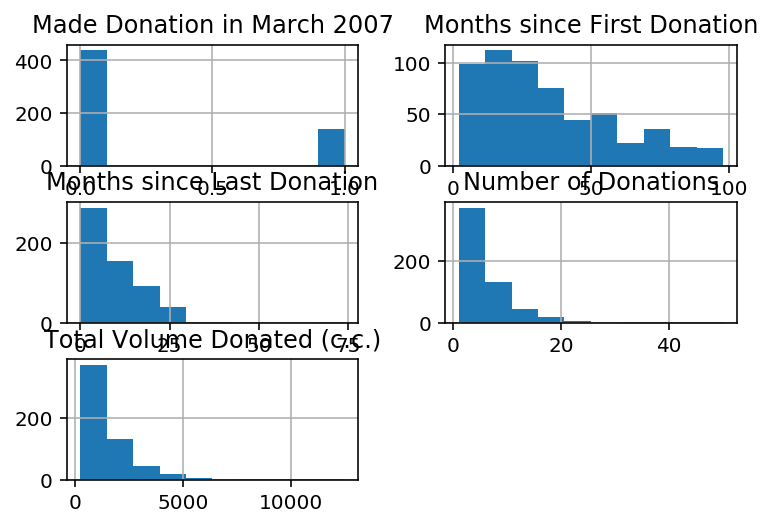

In [14]:
fig=plt.figure(figsize=(16, 9), dpi= 80, facecolor='w', edgecolor='k')

train.hist()
plt.show()

In [15]:
correlations = train.corr()
correlations

,Months since Last Donation,Number of Donations,Total Volume Donated (c.c.),Months since First Donation,Made Donation in March 2007
Months since Last Donation,1.000000,-0.159731,-0.159731,0.186899,-0.261234
Number of Donations,-0.159731,1.000000,1.000000,0.622116,0.220615
Total Volume Donated (c.c.),-0.159731,1.000000,1.000000,0.622116,0.220615
Months since First Donation,0.186899,0.622116,0.622116,1.000000,-0.019819
Made Donation in March 2007,-0.261234,0.220615,0.220615,-0.019819,1.000000


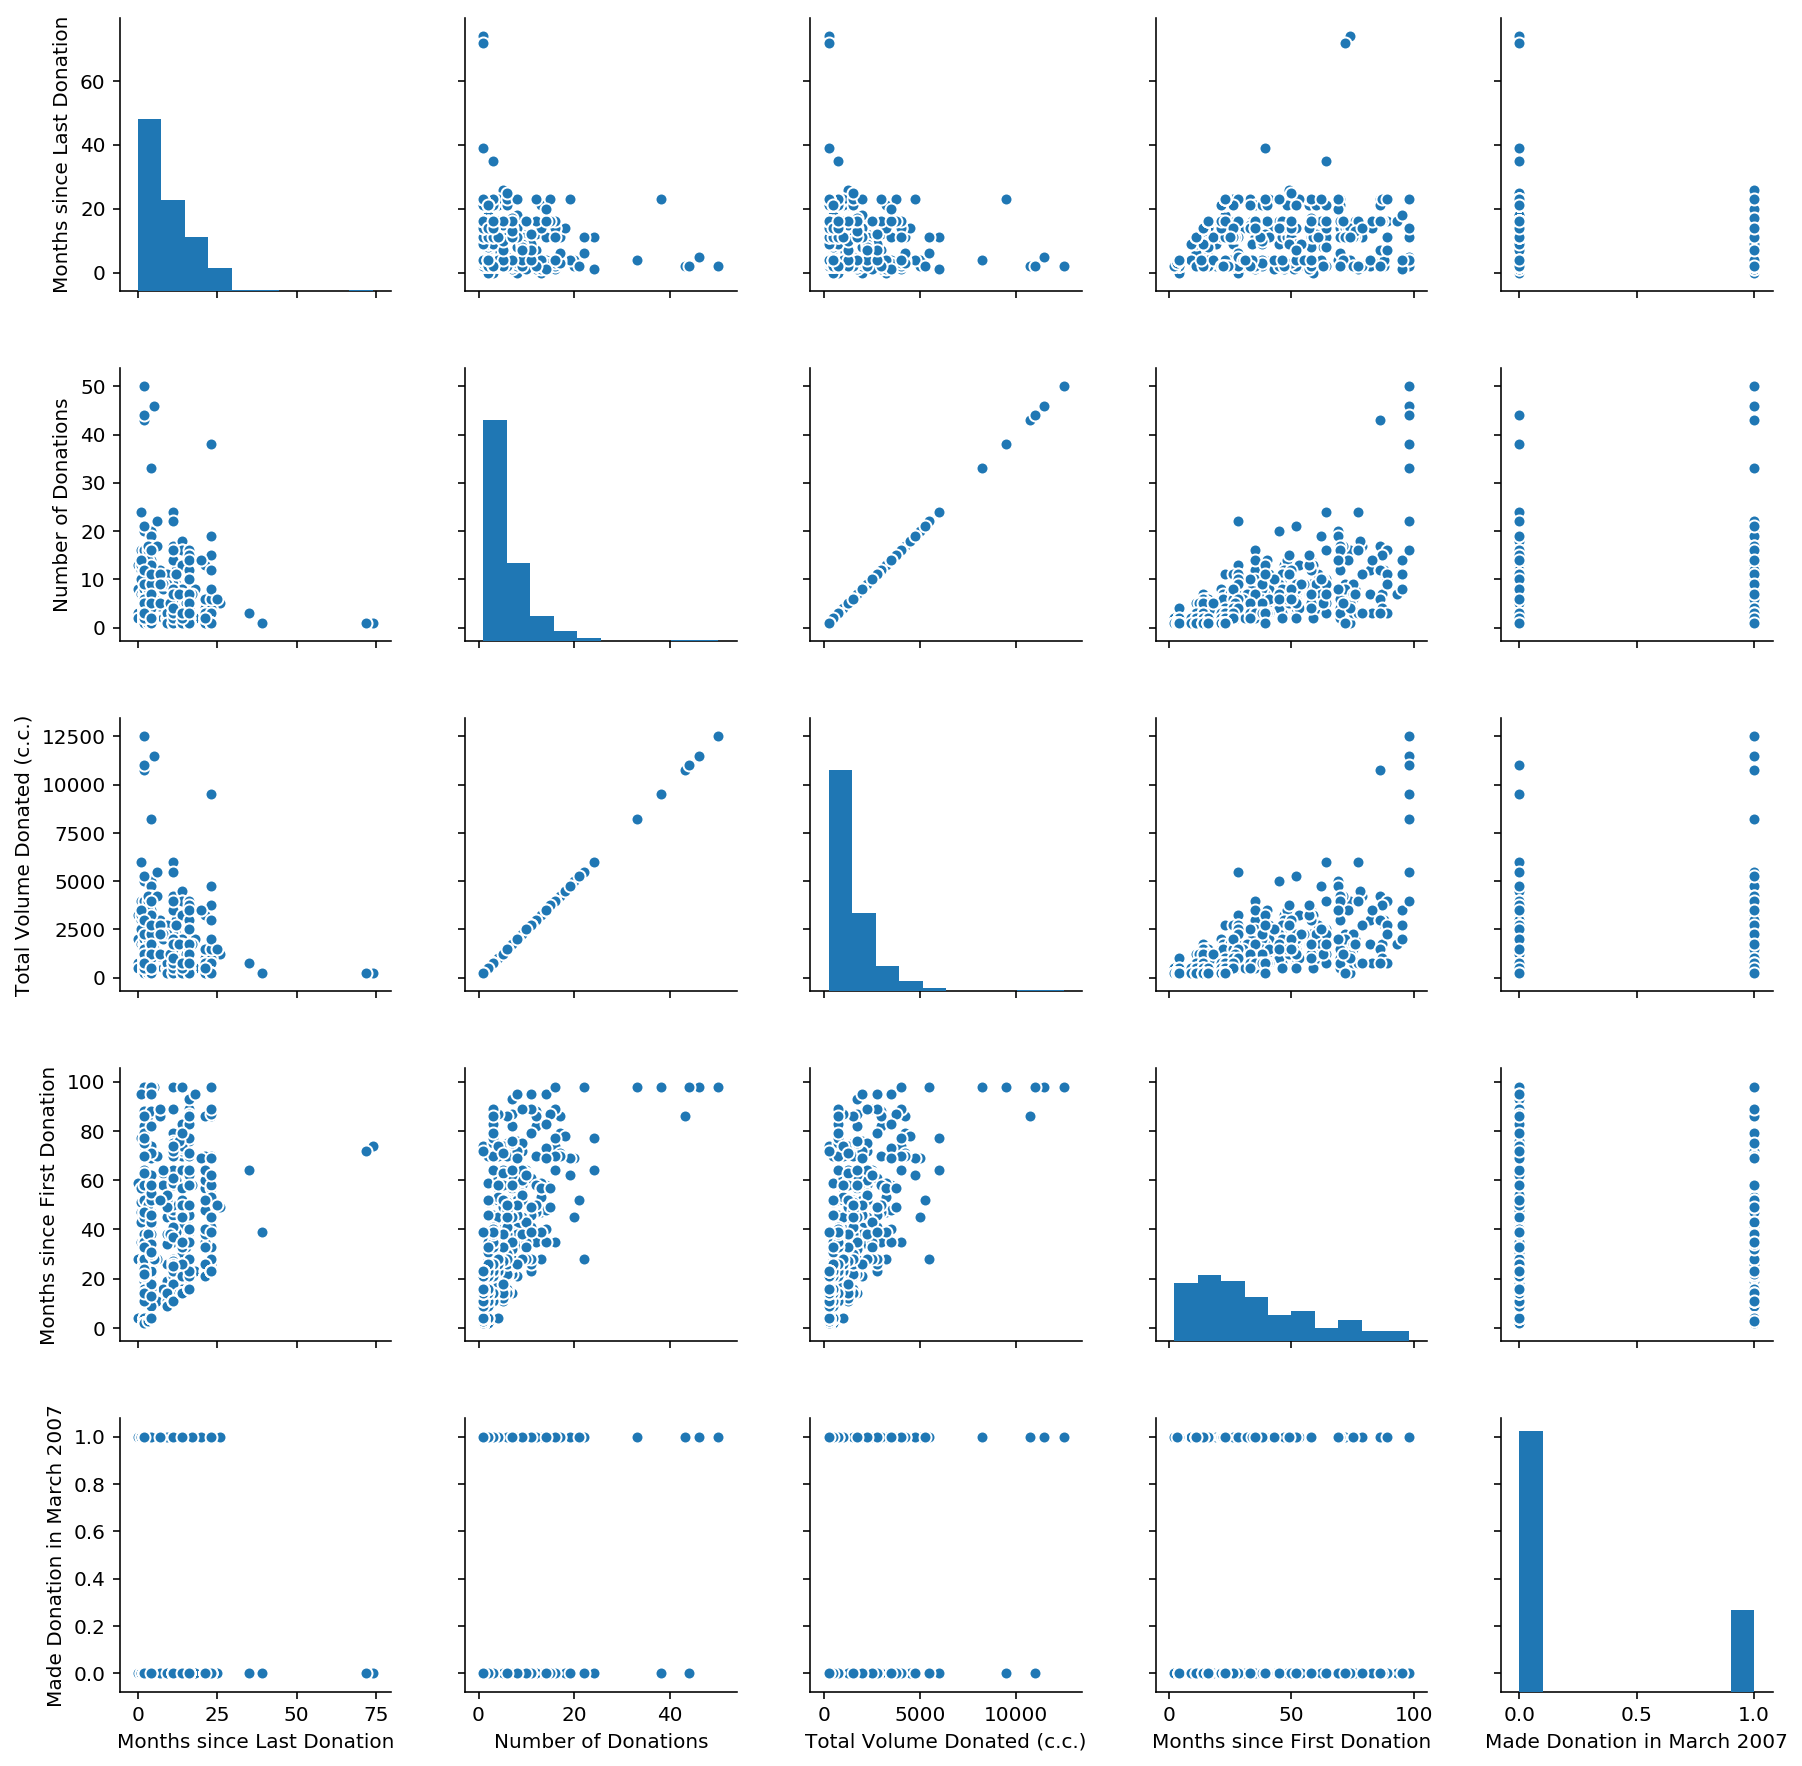

In [16]:
import seaborn as sns
sns.pairplot(train)  

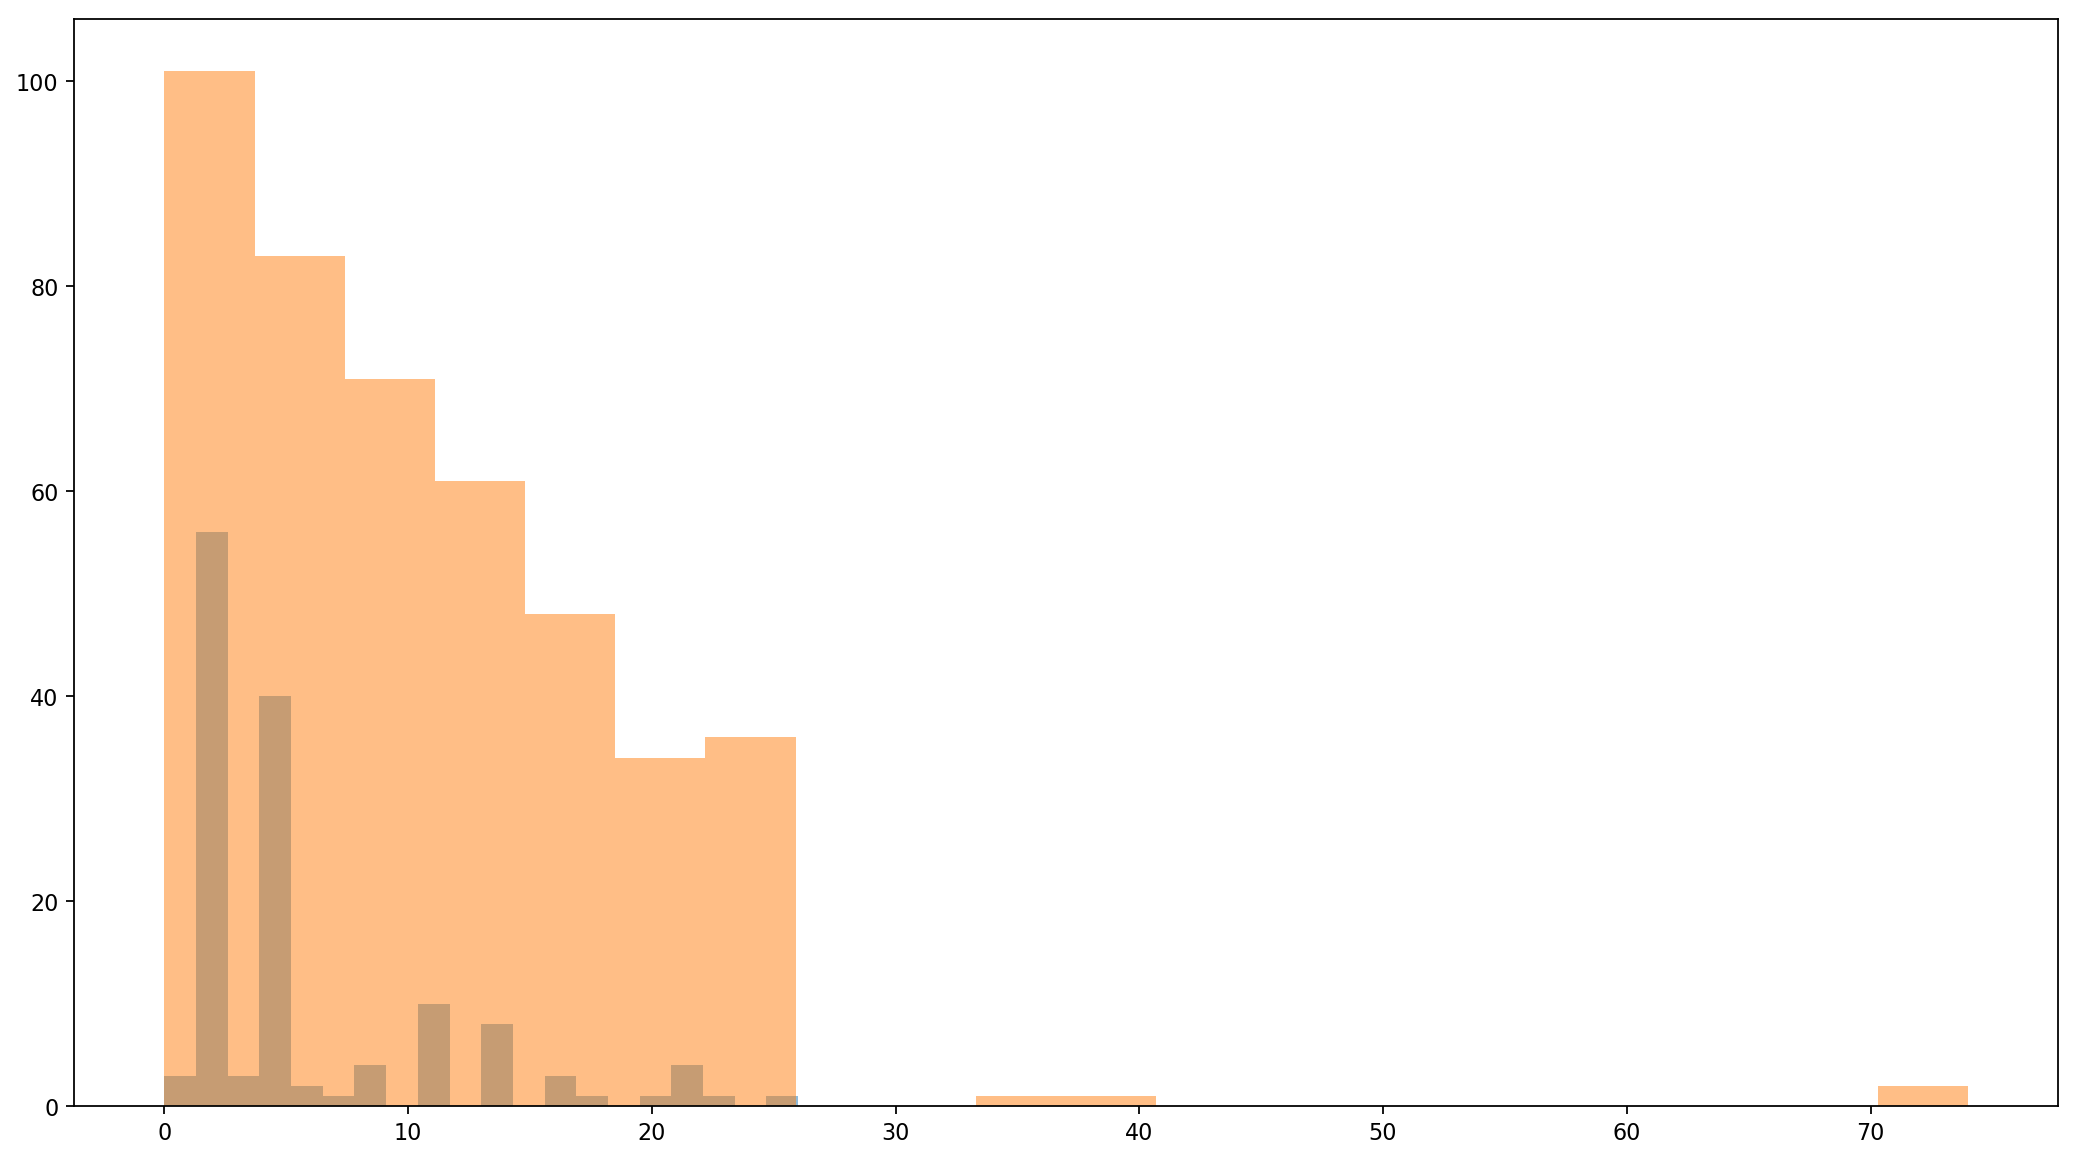

In [17]:
fig=plt.figure(figsize=(16, 9), dpi= 80, facecolor='w', edgecolor='k')
plt.hist(train[train['Made Donation in March 2007']==1]['Months since Last Donation'], alpha=0.5, bins=20);
plt.hist(train[train['Made Donation in March 2007']==0]['Months since Last Donation'], alpha=0.5, bins=20);
plt.show();

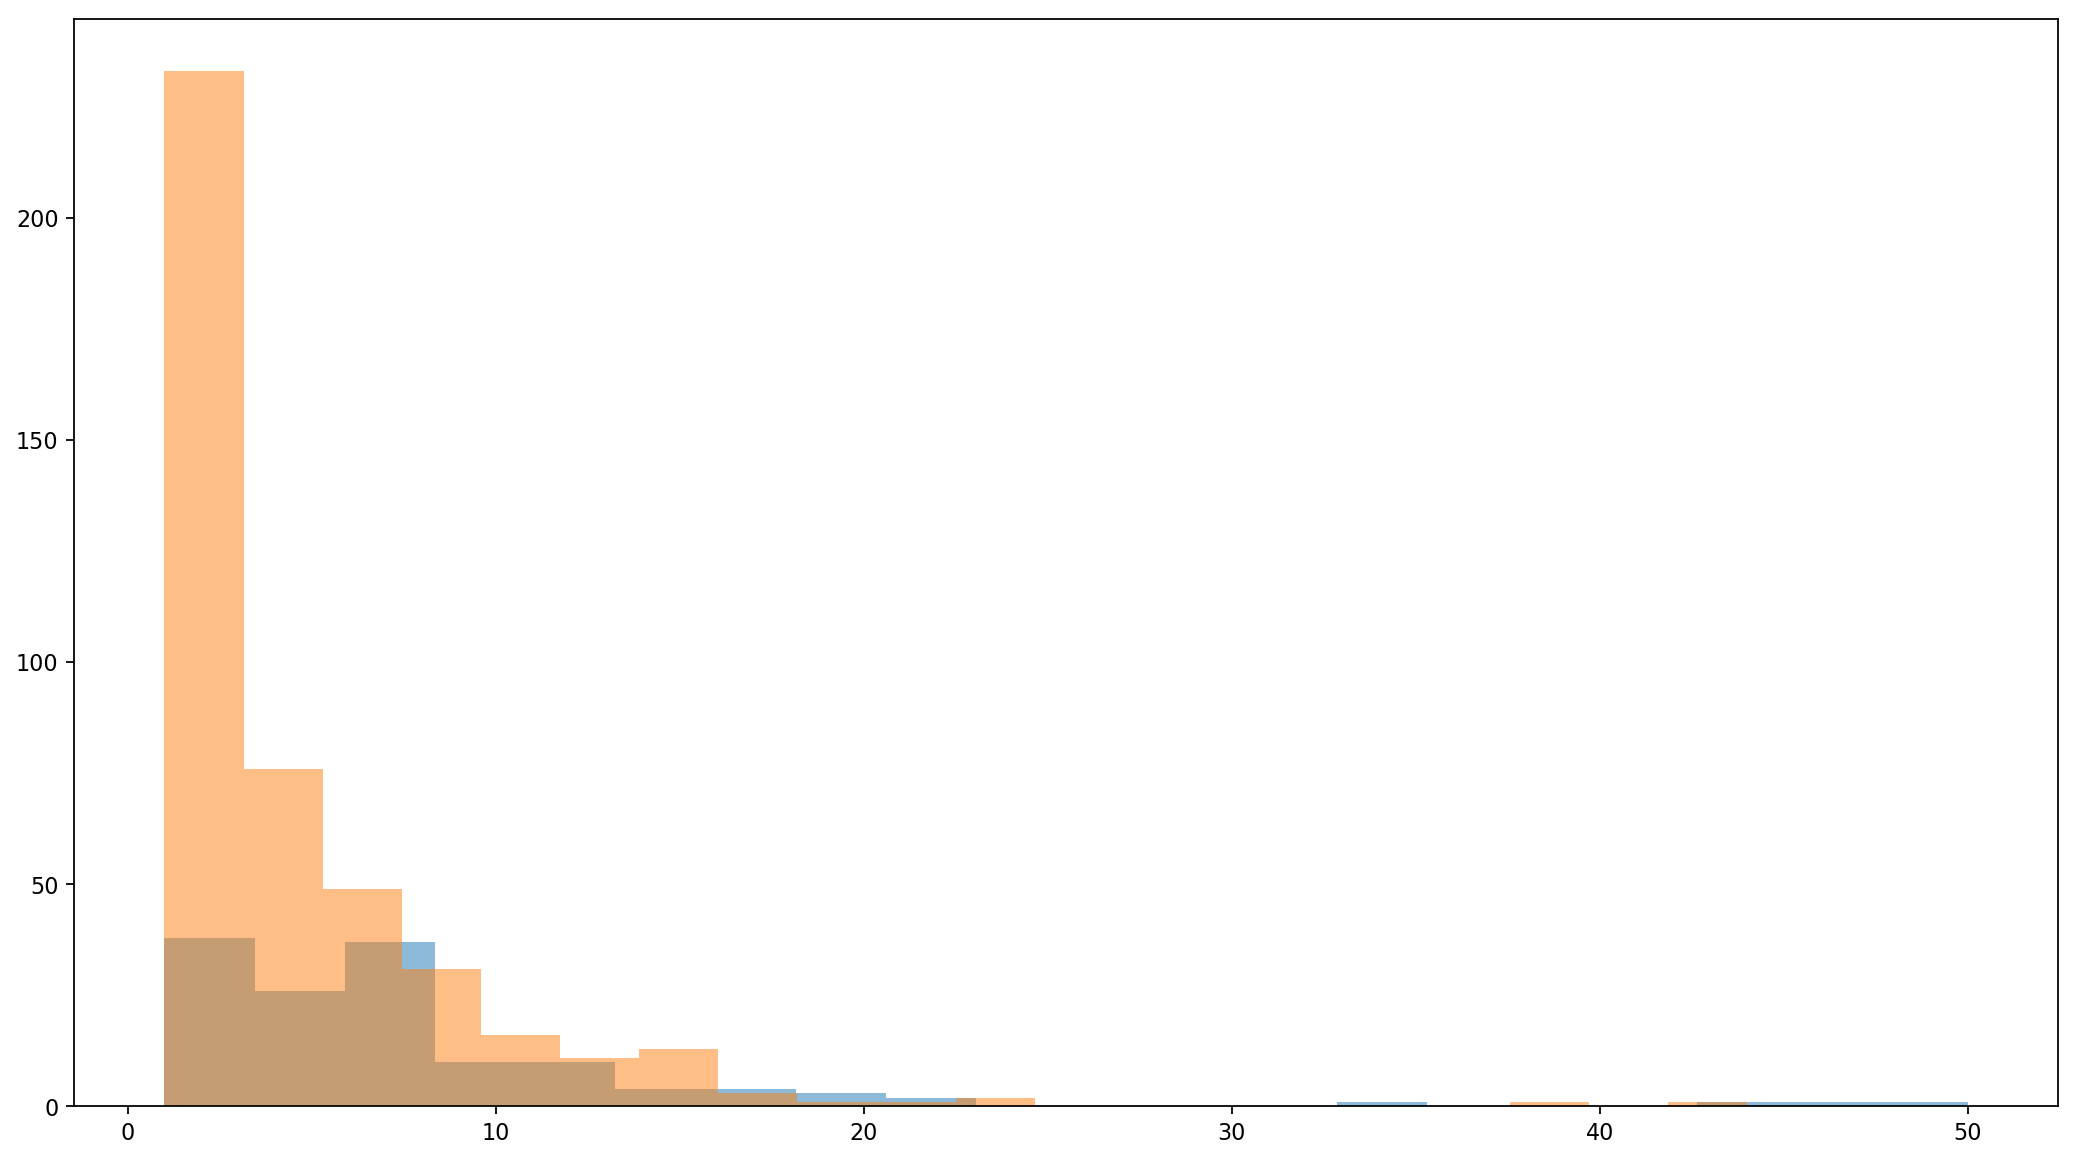

In [18]:
fig=plt.figure(figsize=(16, 9), dpi= 80, facecolor='w', edgecolor='k')
plt.hist(train[train['Made Donation in March 2007']==1]['Number of Donations'], alpha=0.5, bins=20);
plt.hist(train[train['Made Donation in March 2007']==0]['Number of Donations'], alpha=0.5, bins=20);
plt.show();

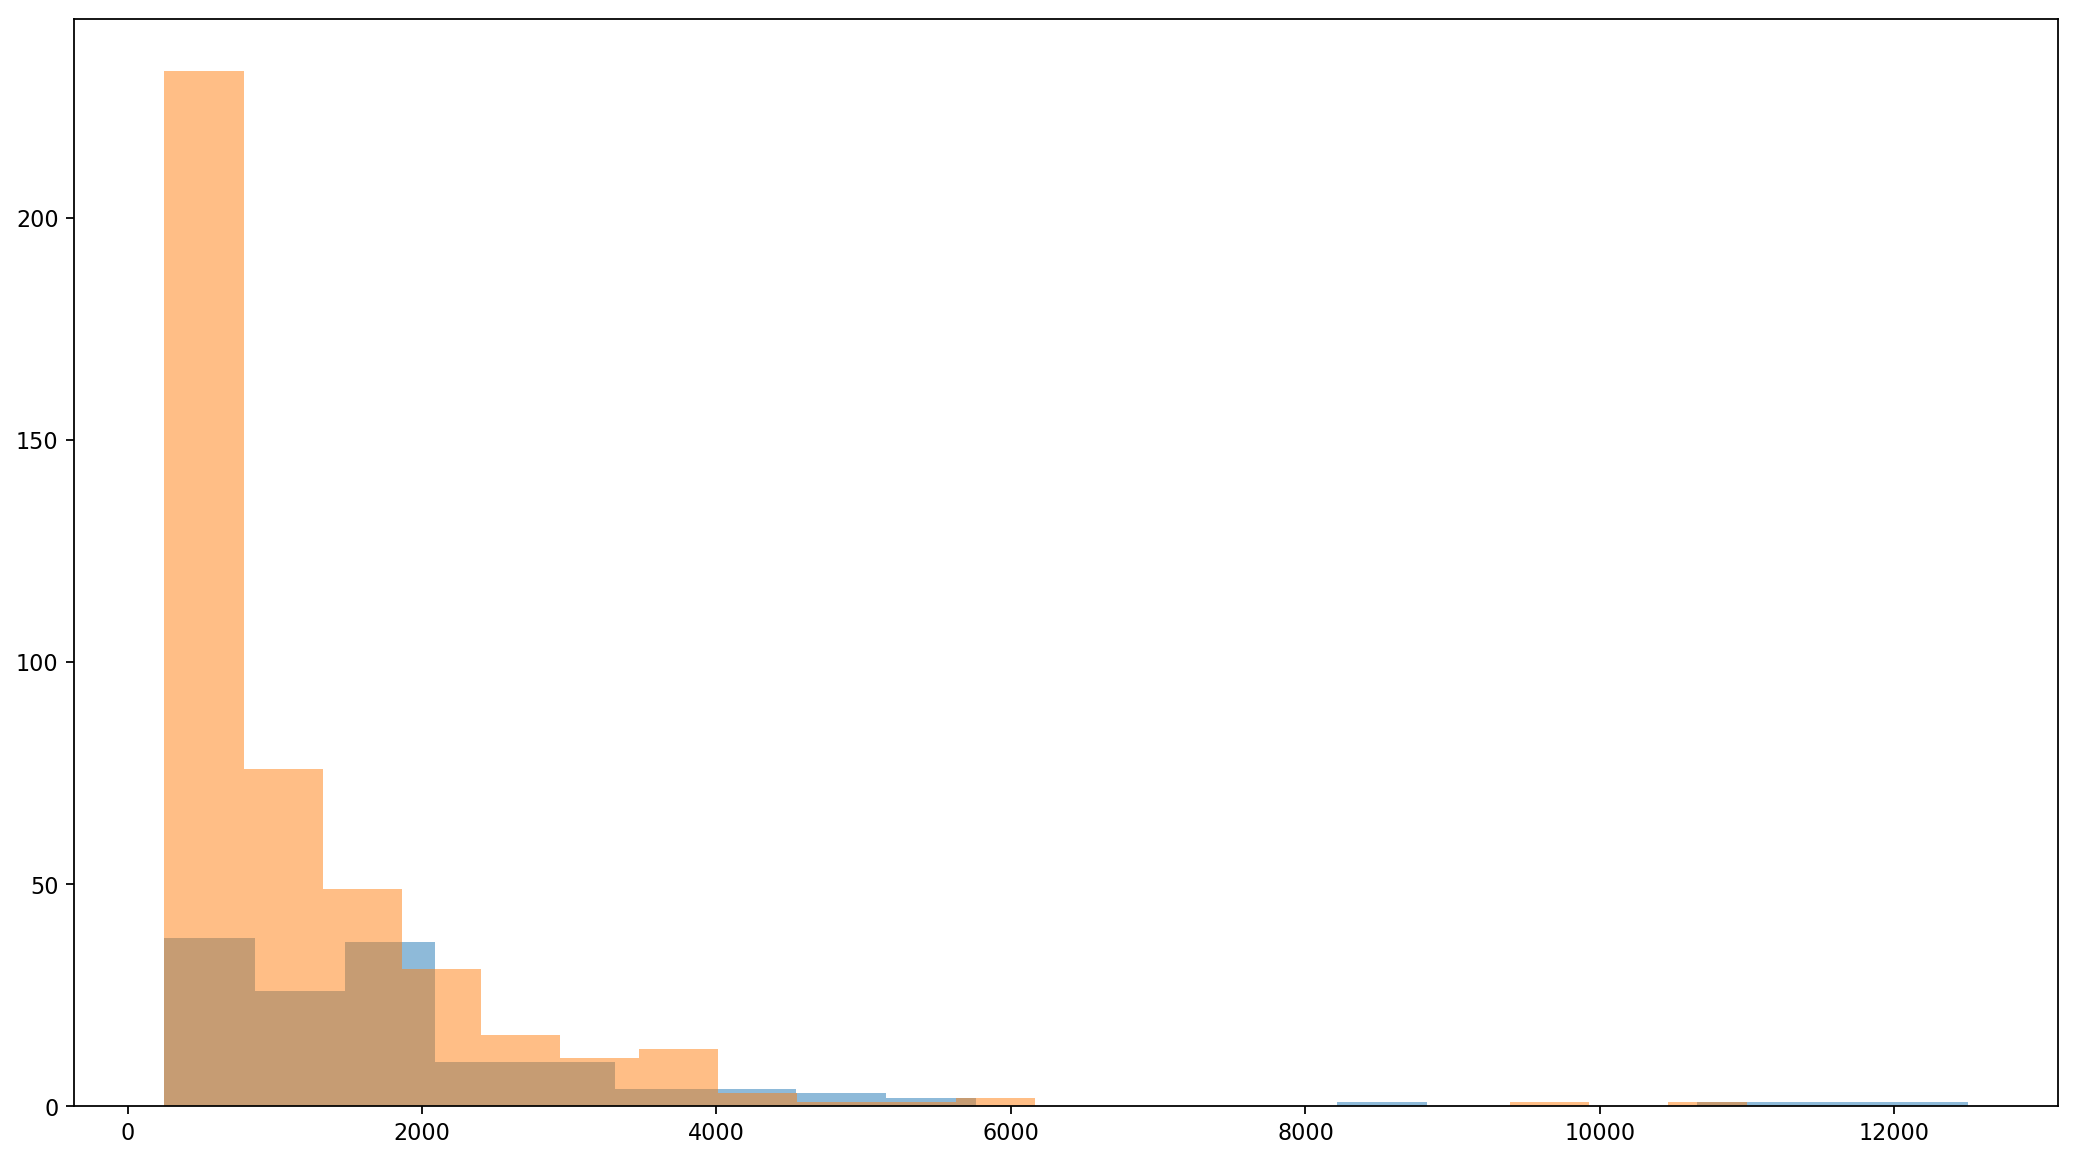

In [19]:
fig=plt.figure(figsize=(16, 9), dpi= 80, facecolor='w', edgecolor='k')
plt.hist(train[train['Made Donation in March 2007']==1]['Total Volume Donated (c.c.)'], alpha=0.5, bins=20);
plt.hist(train[train['Made Donation in March 2007']==0]['Total Volume Donated (c.c.)'], alpha=0.5, bins=20);
plt.show();

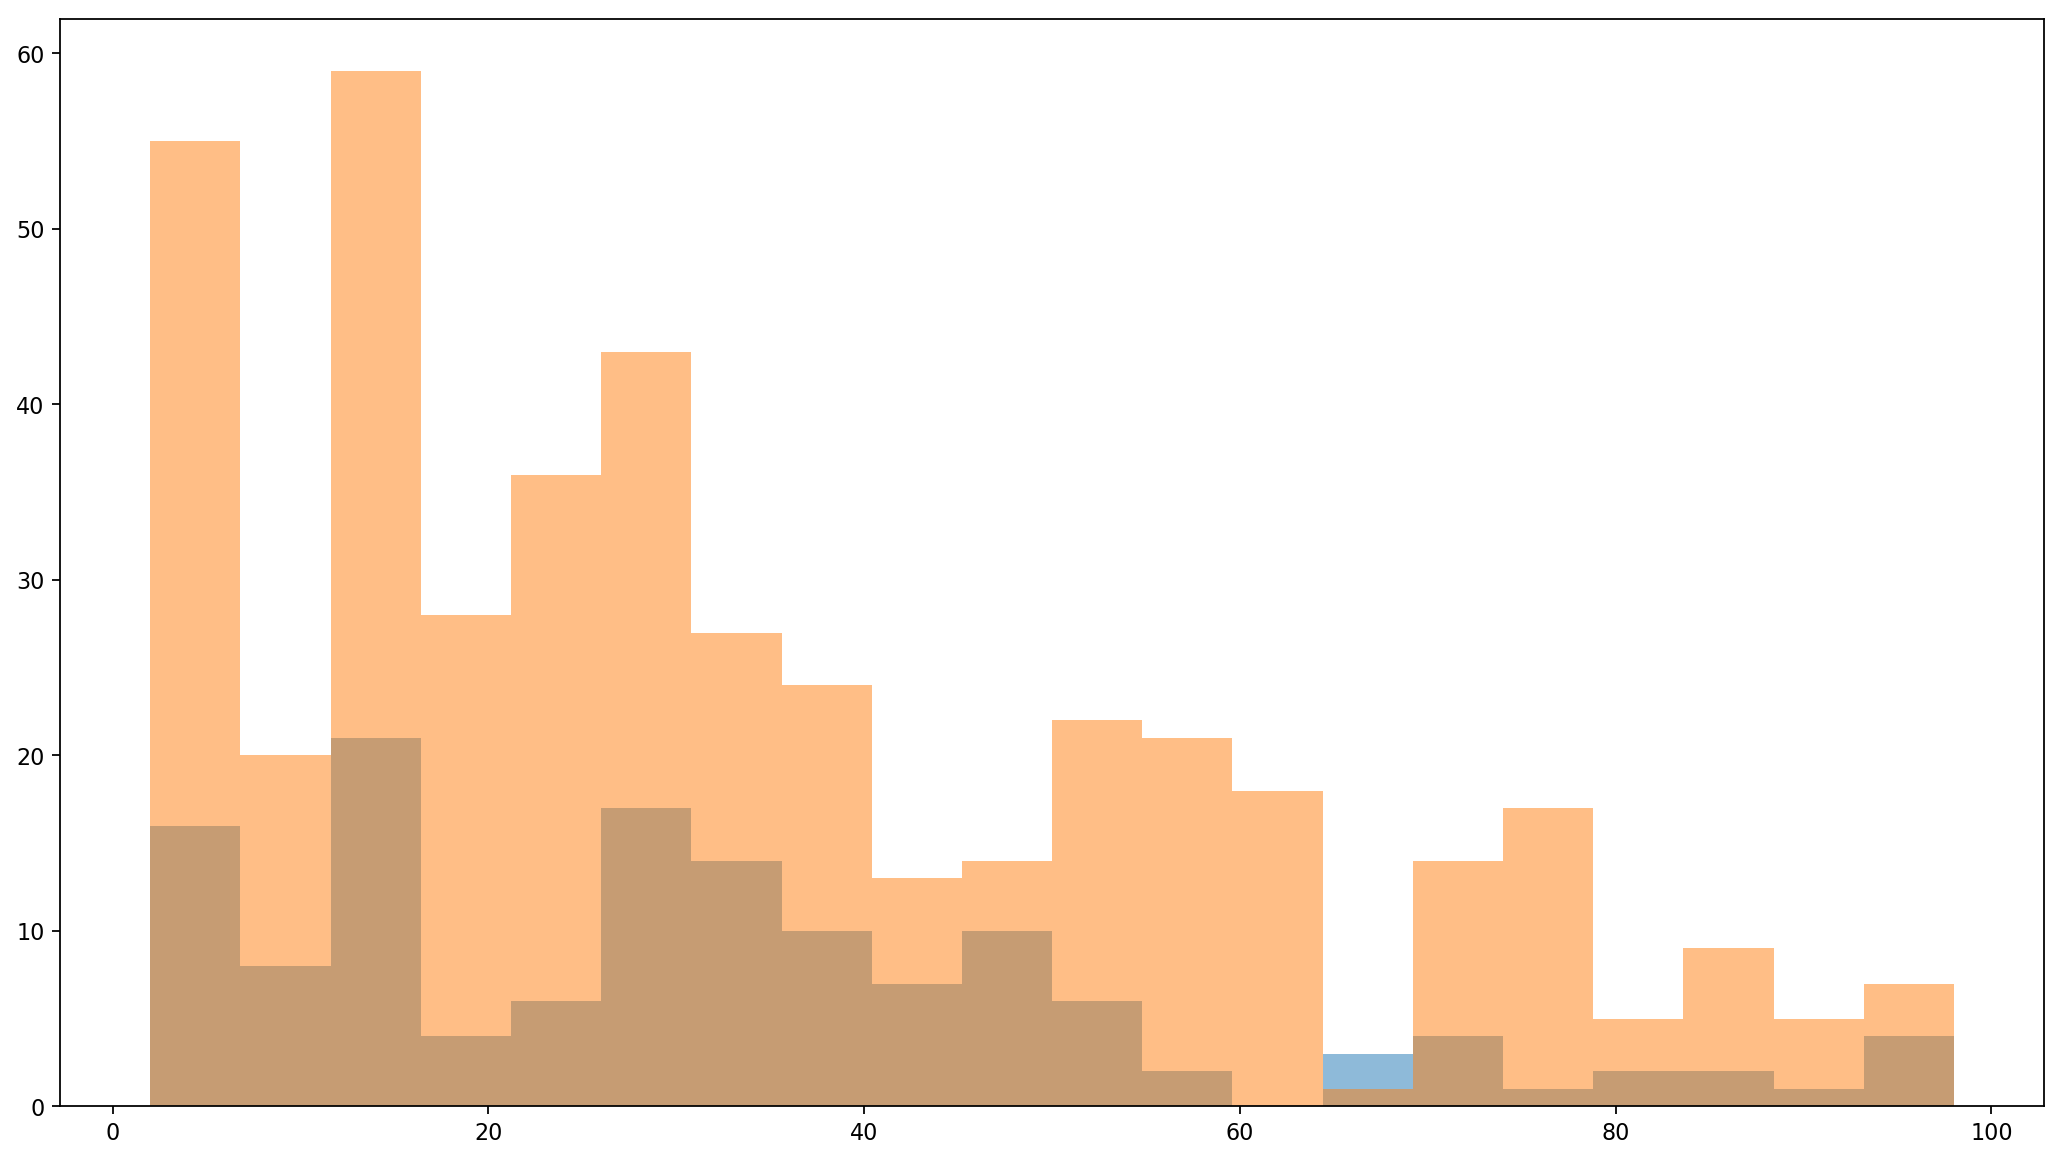

In [20]:
fig=plt.figure(figsize=(16, 9), dpi= 80, facecolor='w', edgecolor='k')
plt.hist(train[train['Made Donation in March 2007']==1]['Months since First Donation'], alpha=0.5, bins=20);
plt.hist(train[train['Made Donation in March 2007']==0]['Months since First Donation'], alpha=0.5, bins=20);
plt.show();

In [21]:
train['Frequency'] = (train['Months since First Donation'] - train['Months since Last Donation'])/train['Number of Donations']
train['DueTime']  = train['Months since Last Donation'] - train['Frequency']

test['Frequency'] = (test['Months since First Donation'] - test['Months since Last Donation'])/test['Number of Donations']
test['DueTime']  = test['Months since Last Donation'] - test['Frequency']

# Data normalization

In [22]:
train = train.drop(['Made Donation in March 2007'], axis=1)
Xtr = train.values
Xts = test.values

In [23]:
Xtr.shape
Xts.shape

(576, 6)

(200, 6)

In [24]:
train_mean = np.mean(Xtr)
train_std = np.std(Xtr)

xtrain = (Xtr - train_mean)/train_std
xts = (Xts - train_mean)/train_std

In [25]:
#test train split
from sklearn.model_selection import train_test_split
xtr,xtval,ytr,yval = train_test_split(xtrain, ytrain)

In [26]:
from xgboost import XGBClassifier

In [27]:
from sklearn.metrics import log_loss

def cross_entropy(predictions, targets):
    N = predictions.shape[0]
    ce = -np.sum(targets*np.log(predictions))/N
    return ce

from sklearn.metrics import make_scorer
entropy_scorer = make_scorer(cross_entropy)

In [28]:
param_dist = {"max_depth": [3,4,5],
              "colsample_bytree": [0.7,0.8,0.9],
              "gamma": [0.5, 1.0, 1.5],
              "reg_alpha": [0.4, 0.5, 0.6],
              "reg_lambda": [0.5, 1.0, 1.5],
              "learning_rate": [0.05, 0.1, 0.15, 0.2],
              "n_estimators": [100,150,200,250],
              "min_child_weight": [1,2,3,4],}
              

In [29]:
model = XGBClassifier(njobs=-1,objective='binary:logistic', random_state=31)

In [30]:
from sklearn.model_selection import RandomizedSearchCV
n_iter_search = 5000
random_search = RandomizedSearchCV(model, param_distributions=param_dist,
                                   n_iter=n_iter_search, n_jobs=-1, scoring='neg_log_loss',cv=6, verbose=1)


In [31]:
import time
t1 = time.time()
random_search.fit(xtrain, ytrain)

t2 = time.time()
print("Time taken in random hyperparameters search: ",t2-t1)

Fitting 6 folds for each of 5000 candidates, totalling 30000 fits


[Parallel(n_jobs=-1)]: Done  52 tasks      | elapsed:    1.1s
[Parallel(n_jobs=-1)]: Done 352 tasks      | elapsed:    7.3s
[Parallel(n_jobs=-1)]: Done 852 tasks      | elapsed:   17.2s
[Parallel(n_jobs=-1)]: Done 1552 tasks      | elapsed:   32.3s
[Parallel(n_jobs=-1)]: Done 2452 tasks      | elapsed:   54.1s
[Parallel(n_jobs=-1)]: Done 3552 tasks      | elapsed:  1.4min
[Parallel(n_jobs=-1)]: Done 4852 tasks      | elapsed:  1.9min
[Parallel(n_jobs=-1)]: Done 6352 tasks      | elapsed:  2.2min
[Parallel(n_jobs=-1)]: Done 8052 tasks      | elapsed:  2.6min
[Parallel(n_jobs=-1)]: Done 10094 tasks      | elapsed:  3.0min
[Parallel(n_jobs=-1)]: Done 14294 tasks      | elapsed:  3.5min
[Parallel(n_jobs=-1)]: Done 18894 tasks      | elapsed:  4.0min
[Parallel(n_jobs=-1)]: Done 23894 tasks      | elapsed:  4.6min
[Parallel(n_jobs=-1)]: Done 29294 tasks      | elapsed:  5.3min
[Parallel(n_jobs=-1)]: Done 30000 out of 30000 | elapsed:  5.3min finished


RandomizedSearchCV(cv=6, error_score='raise',
          estimator=XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, learning_rate=0.1, max_delta_step=0,
       max_depth=3, min_child_weight=1, missing=None, n_estimators=100,
       n_jobs=1, njobs=-1, nthread=None, objective='binary:logistic',
       random_state=31, reg_alpha=0, reg_lambda=1, scale_pos_weight=1,
       seed=None, silent=True, subsample=1),
          fit_params=None, iid=True, n_iter=5000, n_jobs=-1,
          param_distributions={'max_depth': [3, 4, 5], 'colsample_bytree': [0.7, 0.8, 0.9], 'gamma': [0.5, 1.0, 1.5], 'reg_alpha': [0.4, 0.5, 0.6], 'reg_lambda': [0.5, 1.0, 1.5], 'learning_rate': [0.05, 0.1, 0.15, 0.2], 'n_estimators': [100, 150, 200, 250], 'min_child_weight': [1, 2, 3, 4]},
          pre_dispatch='2*n_jobs', random_state=None, refit=True,
          return_train_score='warn', scoring='neg_log_loss', verbose=1)

Time taken in random hyperparameters search:  320.702516078949


In [32]:
random_search.best_params_ 

{'reg_lambda': 1.5,
 'reg_alpha': 0.6,
 'n_estimators': 100,
 'min_child_weight': 4,
 'max_depth': 3,
 'learning_rate': 0.05,
 'gamma': 1.5,
 'colsample_bytree': 0.7}

In [33]:
final_model = XGBClassifier(njobs=-1,objective='binary:logistic', random_state=31,
                           reg_lambda=1.5,  reg_alpha = 0.6, n_estimators = 200,  
                            min_child_weight = 3, max_depth = 3, learning_rate= 0.05, 
                            gamma = 1.5, colsample_bytree =0.7)

In [34]:
final_model.fit(xtrain, ytrain)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=0.7, gamma=1.5, learning_rate=0.05,
       max_delta_step=0, max_depth=3, min_child_weight=3, missing=None,
       n_estimators=200, n_jobs=1, njobs=-1, nthread=None,
       objective='binary:logistic', random_state=31, reg_alpha=0.6,
       reg_lambda=1.5, scale_pos_weight=1, seed=None, silent=True,
       subsample=1)

In [35]:
y_pred = final_model.predict_proba(xts)

In [36]:
y_pred = y_pred[:,1]

In [37]:
subm['Made Donation in March 2007'] = pd.Series(y_pred)

In [38]:
subm.to_csv('subm7.csv', index=False)